#### **Import Libraries :-**

In [76]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

#### **Step.01 -   Load the dataset into a Pandas dataframe :-**

In [77]:
# As Provided Insturtion on The UCI Machine Learning Repository Portal for import wine Dataset in python
wine = fetch_ucirepo(id=109)
Data_URL = wine.metadata['data_url']
print(f"Wine Dataset URL : {Data_URL}")

# Fetct the dataset from the Data URL
Wine_Dataset = pd.read_csv(Data_URL)
print("\nFrist Five Rows Of Wine Dataset :-")
display(Wine_Dataset.head())  # To display the first five rows of dataset

Wine Dataset URL : https://archive.ics.uci.edu/static/public/109/data.csv

Frist Five Rows Of Wine Dataset :-


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


#### **Step.02 -    Split the dataset into features and target variables :-**

In [78]:
# Splitting features and target
X = Wine_Dataset.drop('class', axis=1)  # Dropping 'class' column
y = Wine_Dataset['class']  # Selecting only the 'class' column

#### **Step.03 -    Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary**

In [79]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the standardized features
display(pd.DataFrame(X_scaled, columns=X.columns).head())

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#### **Step.04 -    Implement PCA on the preprocessed dataset using the scikit-learn library**

In [80]:
# Initialize PCA
pca = PCA()

In [81]:
# Fit PCA on the standardized features
pca.fit(X_scaled)

PCA()

In [82]:
# Transform the standardized features
X_scaled = pca.transform(X_scaled)

#### **Step.05 -    Determine the optimal number of principal components to retain based on the explained variance ratio**

**`To determine the optimal number of principal components to retain`, we typically look at the cumulative explained variance ratio. We want to retain a sufficient amount of variance in the data while reducing its dimensionality. One common approach is to choose the number of components that explain a significant portion of the variance, often around 80-95%.**

In [83]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print("Number of components to retain 95% of the variance:", n_components)

Number of components to retain 95% of the variance: 10


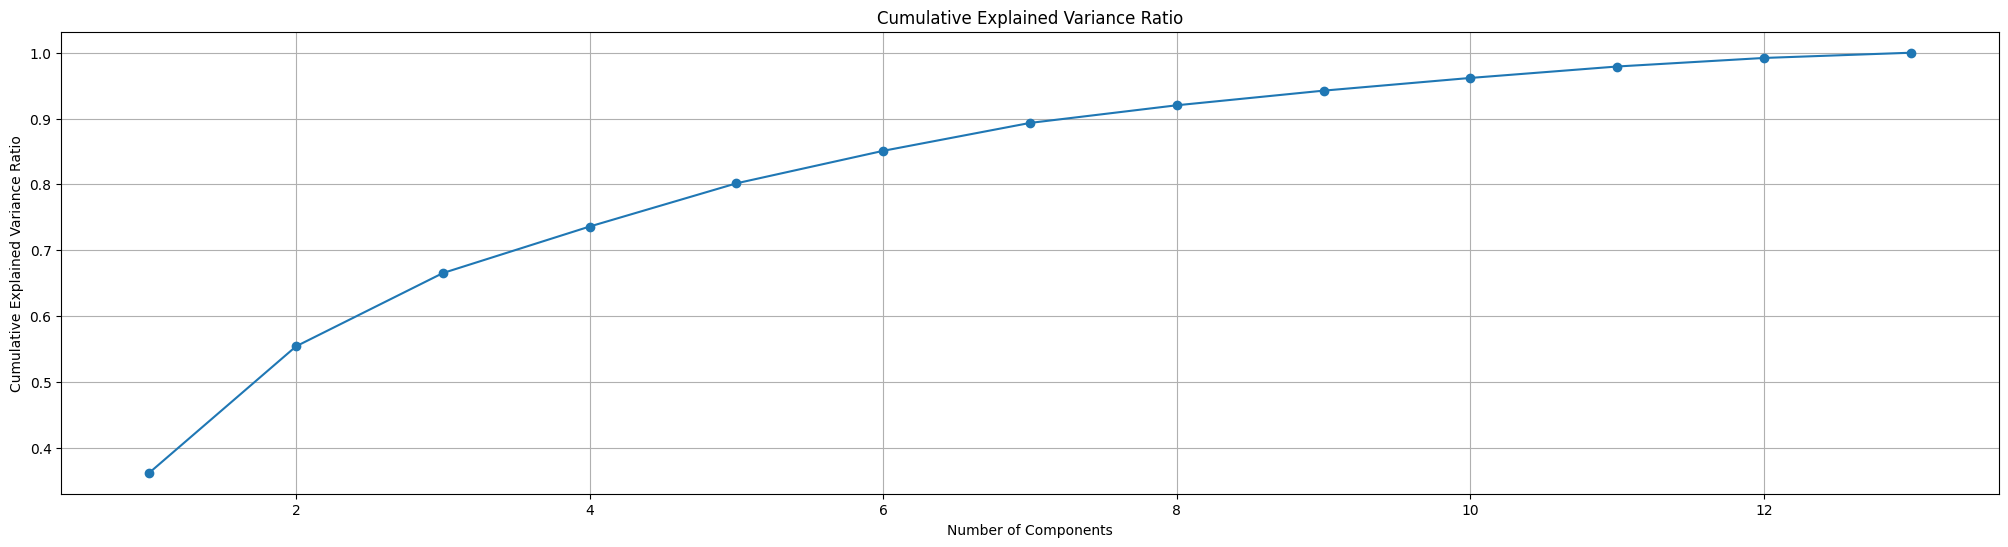

In [84]:
# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Visualize the cumulative explained variance ratio
plt.figure(figsize=(25, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

#### **Step.06 -    Visualise the results of PCA using a scatter plot**

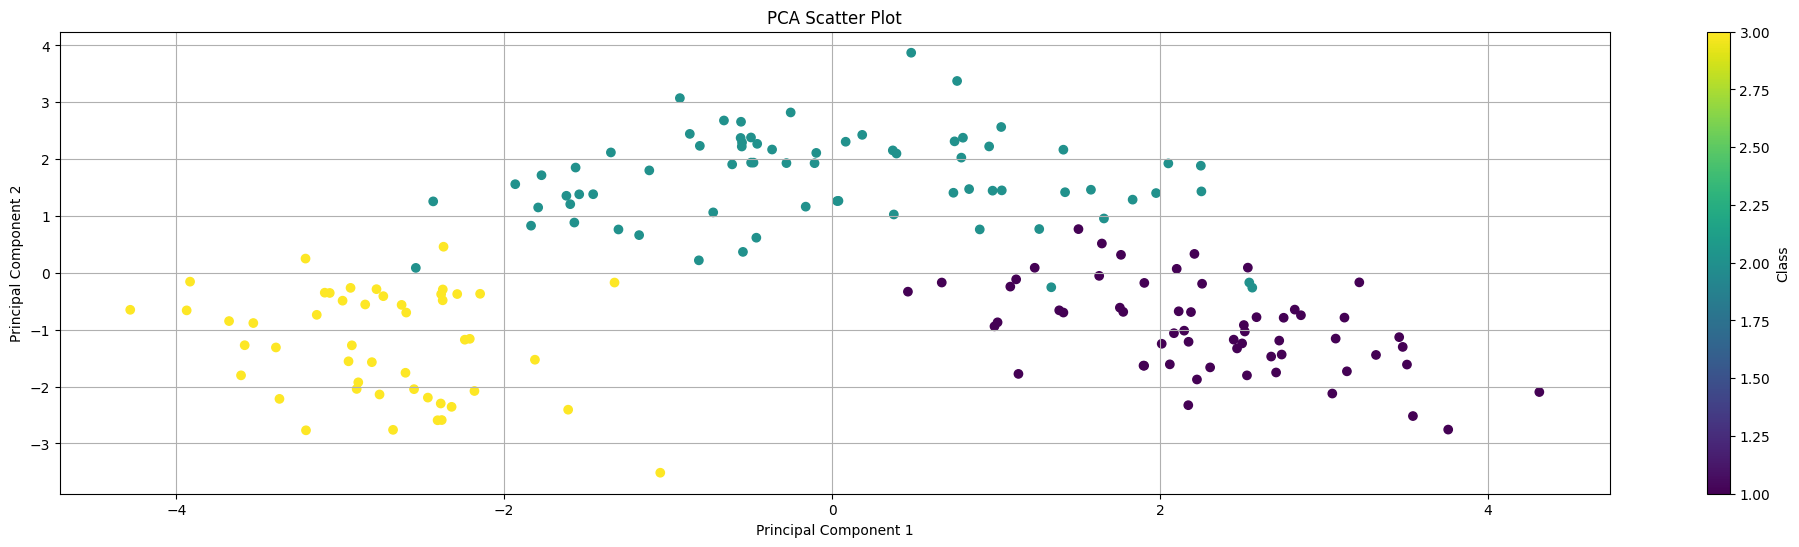

In [85]:
# Visualize PCA results with a scatter plot
plt.figure(figsize=(25, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

#### **Step.07 -    Perform clustering on the PCA-transformed data using K-Means clustering algorithm**

In [90]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
Wine_Dataset['Cluster'] = cluster_labels
display(Wine_Dataset.head())

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2


#### **Step.08 -   PCA Analysis Results :-**

In [93]:
explained_variance_ratio = pca.explained_variance_ratio_
display("Explained Variance Ratio:", explained_variance_ratio)

principal_components = pca.components_
print("Principal Components:")
display(principal_components)

transformed_data = pca.transform(X_scaled)
print("Transformed Data:")
display(transformed_data)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print("Loadings:")
display(loadings)

'Explained Variance Ratio:'

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Principal Components:


array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

Transformed Data:


array([[ 1.28845061, -2.00161234, -0.87786254, ..., -1.01544846,
        -0.18149354,  0.53046403],
       [-0.3807274 , -0.44778821, -1.87871951, ...,  0.32036393,
         0.19785802,  0.8644673 ],
       [ 0.44604238, -1.33909106,  0.27950997, ..., -0.38323328,
        -0.99479214,  0.1456407 ],
       ...,
       [ 1.23717139,  2.18222552,  0.4126196 , ...,  1.21280064,
         0.77244609,  0.41417454],
       [ 1.30183596,  1.39317733, -0.00891939, ...,  0.74599363,
         0.67868641, -0.10228515],
       [ 0.16123926,  2.17433433,  1.41361835, ..., -0.06666764,
        -0.01391939, -0.46491333]])

Loadings:


array([[ 0.31397655, -0.76641313, -0.25008675, -0.0171659 , -0.24608668,
        -0.17153444, -0.04198183, -0.2345152 ,  0.27414147,  0.10629216,
        -0.10765228, -0.10970347,  0.00482679],
       [-0.53338511, -0.35643434,  0.10734238,  0.51613167,  0.03261871,
        -0.43121967,  0.31304085, -0.03896956, -0.04057693, -0.15525538,
         0.03644633,  0.05013577,  0.00837153],
       [-0.00446191, -0.50085499,  0.75517562, -0.20589456, -0.13248581,
        -0.12408866, -0.11104362,  0.10079426, -0.16584475, -0.01362548,
        -0.23763276, -0.0204432 , -0.04553312],
       [-0.52062156,  0.01678212,  0.73811964,  0.05850631,  0.06123176,
         0.08099178, -0.21362177, -0.25335917,  0.10804051,  0.02652192,
         0.22839907, -0.02296469,  0.02956143],
       [ 0.30889183, -0.47481174,  0.15768234, -0.33819453,  0.67347171,
        -0.03064082,  0.24035652,  0.09256627,  0.14628373,  0.03409221,
         0.03397007,  0.02563315,  0.01830579],
       [ 0.85855172, -0.103064

#### **Step.09 -    Clustering Analysis Results :-**

Cluster Centers:


,PC1,PC2,PC3
0,-0.036957,1.772239,0.186139
1,-2.720036,-1.125651,-0.239093
2,2.276194,-0.932054,0.001528


Cluster Sizes:


Cluster
0    65
1    51
2    62
Name: count, dtype: int64


Silhouette Score: 0.2848589191898987


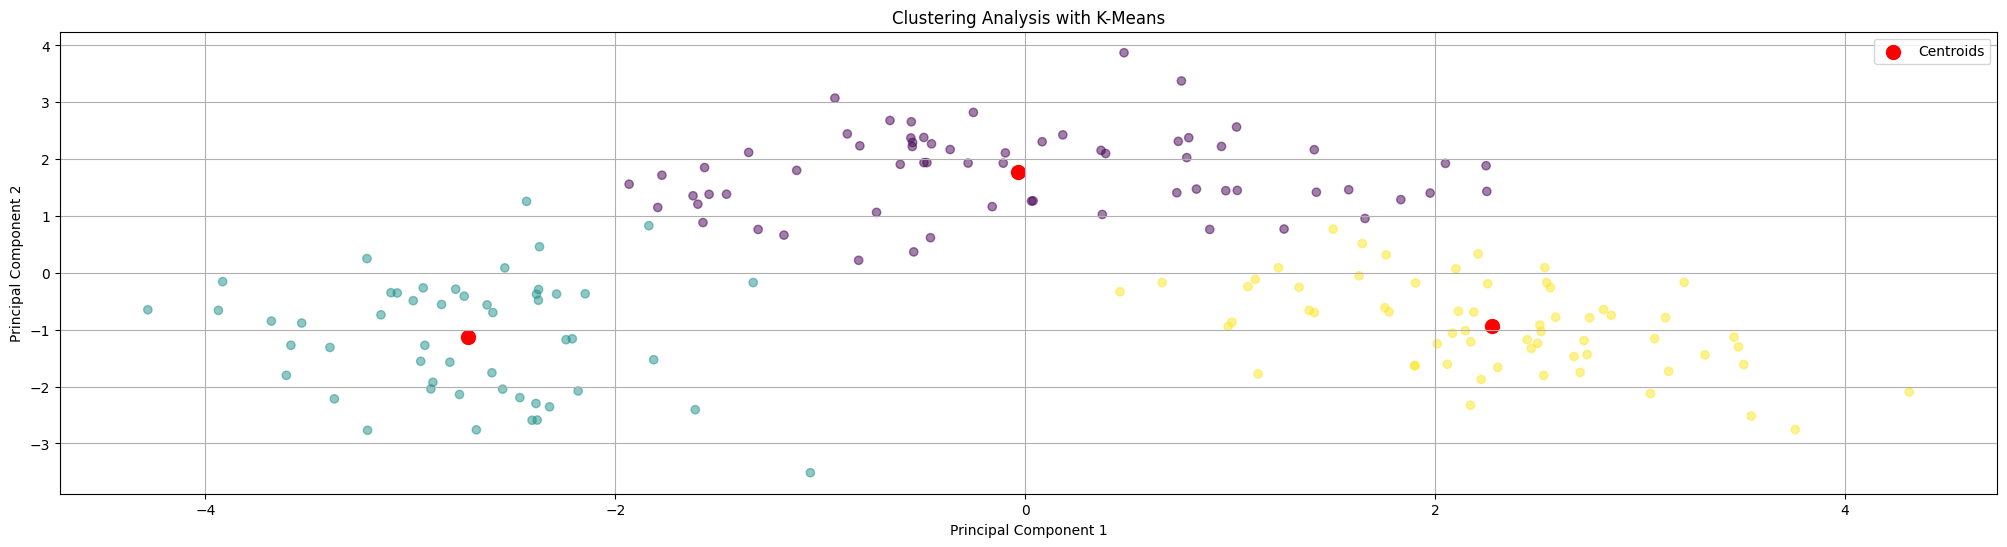

In [ ]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
display(pd.DataFrame(cluster_centers[:, :3], columns=['PC1', 'PC2', 'PC3']))

cluster_sizes = Wine_Dataset['Cluster'].value_counts().sort_index()
print("Cluster Sizes:")
display(cluster_sizes)

silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("\nSilhouette Score:", silhouette_avg)

plt.figure(figsize=(25, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='red', s=100, label='Centroids')
plt.title('Clustering Analysis with K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

#### **Step.10 -    The performance metrics for the clustering algorithm**

In [103]:
import pandas as pd

# Define the performance metrics
metrics = {
    "Silhouette Score": [silhouette_avg],
    "Cluster 0 Size": [cluster_sizes[0]],
    "Cluster 1 Size": [cluster_sizes[1]],
    "Cluster 2 Size": [cluster_sizes[2]]
}

metrics_df = pd.DataFrame(metrics)
print("Performance Metrics for Clustering Algorithm:")
display(metrics_df)

Performance Metrics for Clustering Algorithm:


,Silhouette Score,Cluster 0 Size,Cluster 1 Size,Cluster 2 Size
0,0.284859,65,51,62


#### **Step.11 -    Interpret the results of PCA and clustering analysis**

**Principal Component Analysis (PCA) Results**

-   **`The PCA results reveal the underlying structure of the data in a lower-dimensional space. Key findings include` :**

      1. **Explained Variance Ratio -**

         - The first few principal components explain a significant portion of the variance in the data, with PC1 explaining approximately 36.2% and PC2 explaining around 19.2% of the variance. This suggests that these components capture important information about the dataset.

      2. **Principal Components -**

         - Each principal component represents a linear combination of the original features. The loadings indicate the contribution of each feature to the principal components. For example, PC1 is influenced by features related to alcohol content, color intensity, and other wine characteristics.

      3. **Transformed Data -**

         - The transformed data provides a representation of the original data in terms of the principal components. Each data point's coordinates in this new space reflect its relationships with the principal components.

      4. **Loadings -**

         - Loadings show the correlation between the original features and the principal components. Positive or negative loadings indicate whether a feature positively or negatively contributes to a particular principal component.

**Clustering Analysis Results**

-   **`The clustering analysis applied K-Means algorithm on the PCA-transformed data. Key findings include` :**

      1. **Cluster Centers**:
         - Each cluster center represents the mean values of the principal components for the data points within that cluster. These centers help identify the characteristics of each cluster in the PCA space.

      2. **Cluster Sizes**:
         - The distribution of data points among clusters indicates the relative sizes of each cluster. In this case, Cluster 0 has the largest number of data points, followed by Cluster 2 and Cluster 1.

      3. **Silhouette Score**:
         - The silhouette score of 0.284 suggests that the clusters are somewhat well-separated. While the score could be higher for better-defined clusters, it indicates that the clustering is better than random assignment.